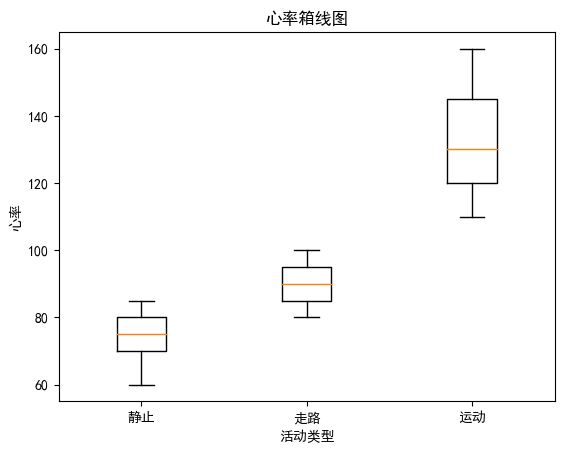

In [4]:
# 心率图例
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

plt.rcParams['axes.unicode_minus'] = False

heart_rate_data = {
    '静止': [60, 65, 70, 72, 75, 78, 80, 82, 85],
    '走路': [80, 82, 85, 88, 90, 92, 95, 98, 100],
    '运动': [110, 125, 130, 135, 115, 145, 120, 155, 160],
}


labels = list(heart_rate_data.keys())
data = list(heart_rate_data.values())


plt.boxplot(data, labels=labels)

plt.title('心率箱线图')
plt.xlabel('活动类型')
plt.ylabel('心率')

plt.savefig("heart_rate.svg")
plt.show()


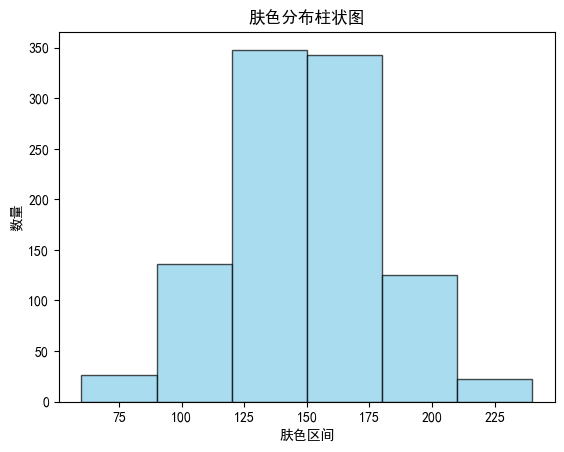

In [7]:
# 肤色图例
import matplotlib.pyplot as plt
import numpy as np

# 模拟肤色分布数据（正态分布）
mean_skin_color = 150  # 均值
std_dev_skin_color = 30  # 标准差
num_samples = 1000  # 样本数量

skin_color_data = np.random.normal(mean_skin_color, std_dev_skin_color, num_samples)
skin_color_data = np.clip(skin_color_data, 60, 240)  # 将数据限制在60到240之间

# 划分区间
bins = np.arange(60, 241, 30)  # 分成6个区间，每个区间宽度为30

# 绘制柱状图
plt.hist(skin_color_data, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)

# 设置图表标题和坐标轴标签
plt.title('肤色分布柱状图')
plt.xlabel('肤色区间')
plt.ylabel('数量')

plt.savefig("skin.svg")
# 显示图表
plt.show()


In [27]:
codec = 'h264'
label = 'T2'
input_video_path = f'D:/dataset/compression/video/vid_s1_{label}.avi'
output_video_path = f'D:/dataset/compression/video/vid_s1_{label}_{codec}.avi'

In [28]:
# 压缩
import ffmpeg

(
    ffmpeg
    .input(input_video_path)
    .output(output_video_path, codec=codec, crf=0,gpu='auto')
    .run()
)

In [2]:
import cv2
import numpy as np

cap1 = cv2.VideoCapture(input_video_path)  
cap2 = cv2.VideoCapture(output_video_path) 

if not cap1.isOpened() or not cap2.isOpened():
    print("Error: One or both videos could not be opened.")
    exit()

width = int(cap1.get(3))
height = int(cap1.get(4))

# 创建VideoWriter对象，用于保存相减后的视频
# out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (width, height))
f = 0
while True:
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()
    if not ret1 or not ret2:
        break
    subtracted_frame = cv2.absdiff(frame1, frame2)
    gray_frame = cv2.cvtColor(subtracted_frame,cv2.COLOR_BGR2GRAY)
    gamma = 0.3
    gamma_corrected_frame = np.power(gray_frame / 255.0, gamma) * 255.0
    gamma_corrected_frame = np.uint8(gamma_corrected_frame)
    cv2.imshow('Subtracted Frame',cv2.cvtColor(gamma_corrected_frame,cv2.COLOR_GRAY2BGR) )
    if f > 200 and f < 220:
        cv2.imwrite(f'img/{f}.png',gamma_corrected_frame)
    # 按 'q' 键退出循环
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    f += 1
# 释放资源
cap1.release()
cap2.release()
# out.release()  # 如果使用VideoWriter对象，记得释放它
cv2.destroyAllWindows()


In [20]:
# PSNR 对比图
import cv2
import numpy as np

def PSNR(frame_1,frame_2):
    f_pow = np.power(frame_1 - frame_2,2)
    average_per_channel = np.mean(f_pow, axis=-1)
    mse = average_per_channel/(frame_1.shape[0] * frame_1.shape[1])
    if (np.sum(mse)/3) == 0:
        return -1
    return 10 * np.log10(np.power(255,2) / (np.sum(mse)/3)) 
n, m = 5, 4  
image_1 = np.random.rand(n, m, 3)  
image_2 = image_1
PSNR(image_1,image_2)

-1

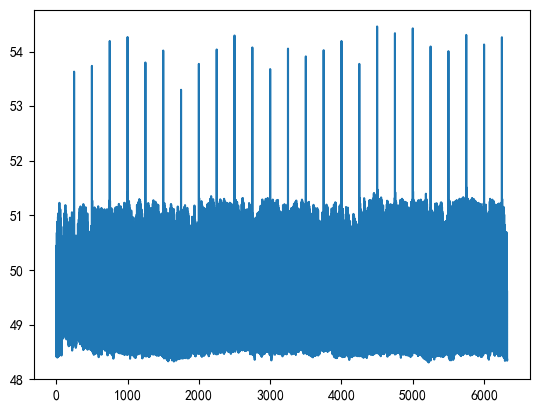

In [22]:
cap_1 = cv2.VideoCapture(input_video_path)  
cap_2 = cv2.VideoCapture(output_video_path) 

if not cap_1.isOpened() or not cap_2.isOpened():
    print("Error: One or both videos could not be opened.")
    exit()

width = int(cap_1.get(3))
height = int(cap_1.get(4))

psnr_1 = []

while True:
    ret_1, frame_1 = cap_1.read()
    ret_2, frame_2 = cap_2.read()
    if not ret_1 or not ret_2:
        break
    subtracted_frame = cv2.absdiff(frame_1, frame_2)

    psnr_1.append(
        PSNR(frame_1,frame_2)
    )
# 释放资源
cap_1.release()
cap_2.release()
# out.release()  # 如果使用VideoWriter对象，记得释放它
cv2.destroyAllWindows()



import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

plt.rcParams['axes.unicode_minus'] = False
plt.plot(psnr_1)

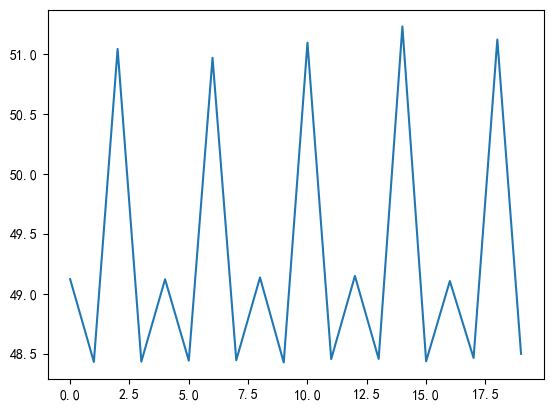

In [26]:
plt.plot(psnr_1[30:50])